# The Sparks Foundation

## Created by - Dhanush H

### TASK#1- Prediction using Supervised ML
**Predict the percentage of an student based on the number of study hours and also find the predicted score if a student studies for 9.25 hrs/ day .**

### Role - Data Science and Business Analytics Intern

###  Simple Linear Regression

 **Import all necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Reading data from remote link**

In [3]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)
print('Data imported successfully')
data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:**

**Plotting the distribution of scores**

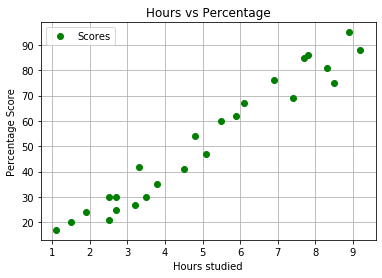

In [6]:
data.plot(x='Hours',y='Scores',c='green',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**



### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [8]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [9]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Training the Algorithm 

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Training complete")

Training complete


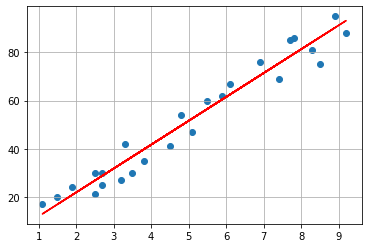

In [21]:
#PLOTTING THE REGRESSION LINE
line = regressor.coef_* X + regressor.intercept_   # y=mx+c

#Plotting for the test data
plt.scatter(X,y)
plt.plot(X,line,'r-')
plt.grid()
plt.show()


### Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
#Testing data - in Hours
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#Predicting the scores
y_pred = regressor.predict(X_test)

In [17]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [18]:
#You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No. of hours = {}".format(hours[0][0]))
print("Predicted score = {}".format(own_pred[0]))

No. of hours = 9.25
Predicted score = 93.69173248737538


Hence, the student will score 93.69% if he/she studies for 9.25 hours per day.

### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform. 

In [19]:
from sklearn import metrics
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975


In [20]:
print("r2 score: {}".format(metrics.r2_score(y_test,y_pred)))

r2 score: 0.9454906892105356
